In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Electricity_Model_Data.csv'
df = pd.read_csv(file_path)

In [4]:
df = df.dropna()

In [5]:
df["Avg_Temperature"] = (df["temperature_max"] + df["temperature_min"]) / 2

In [6]:
if "Went_Out" in df.columns:
    df["Went_Out"] = df["Went_Out"].map({"Yes": 1, "No": 0})

In [7]:
if "Day" in df.columns:
    day_mapping = {
        "Monday": 0, "Tuesday": 1, "Wednesday": 2,
        "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6
    }
    df["Day"] = df["Day"].map(day_mapping)

In [8]:
features = ["Tariff_Rates", "People_at_Home", "Went_Out", "Time_Out", "Fans_in_Use",
            "daily_rainfall", "Avg_Temperature", "Day"]
target = "Usage"

X = df[features]
y = df[target]

In [9]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [14]:
print("Model Performance with Normalized Data and Day Encoding:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model Performance with Normalized Data and Day Encoding:
Mean Absolute Error (MAE): 0.53
Root Mean Squared Error (RMSE): 0.56


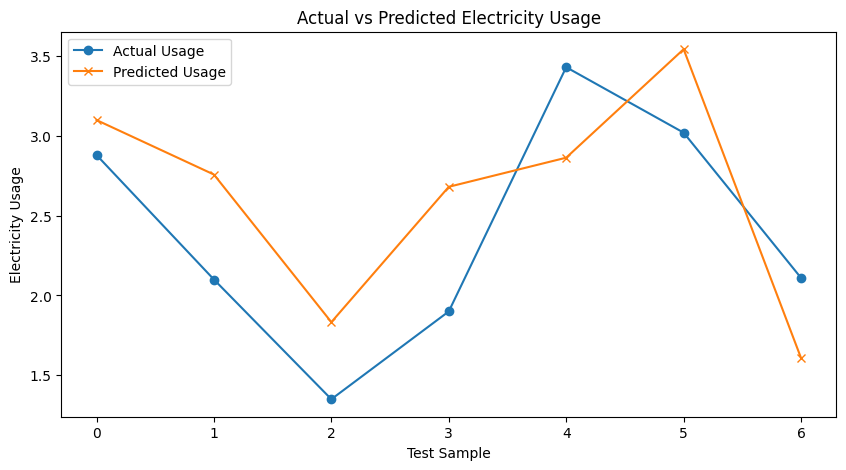

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Usage", marker='o')
plt.plot(y_pred, label="Predicted Usage", marker='x')
plt.legend()
plt.title("Actual vs Predicted Electricity Usage")
plt.xlabel("Test Sample")
plt.ylabel("Electricity Usage")
plt.show()

In [16]:
coefficients = pd.DataFrame({"Feature": features, "Coefficient": model.coef_})
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

In [17]:
print("Feature Importance:")
print(coefficients)

Feature Importance:
           Feature  Coefficient
1   People_at_Home     0.786704
0     Tariff_Rates     0.492046
2         Went_Out     0.186248
5   daily_rainfall     0.041503
6  Avg_Temperature    -0.022611
7              Day    -0.079370
3         Time_Out    -0.278116
4      Fans_in_Use    -0.614044
